# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


(array([1.090e+03, 1.081e+03, 1.063e+03, 1.080e+03, 1.037e+03, 9.610e+02,
        1.030e+03, 1.033e+03, 1.029e+03, 1.004e+03, 9.740e+02, 9.070e+02,
        9.600e+02, 9.650e+02, 9.190e+02, 9.140e+02, 9.240e+02, 9.190e+02,
        9.030e+02, 9.140e+02, 9.140e+02, 8.560e+02, 8.860e+02, 8.320e+02,
        8.020e+02, 8.040e+02, 8.210e+02, 8.010e+02, 8.440e+02, 8.420e+02,
        7.580e+02, 7.970e+02, 7.710e+02, 7.560e+02, 7.660e+02, 7.390e+02,
        7.530e+02, 7.500e+02, 7.140e+02, 7.220e+02, 7.550e+02, 6.730e+02,
        6.790e+02, 6.540e+02, 6.470e+02, 7.000e+02, 6.570e+02, 6.590e+02,
        6.350e+02, 6.340e+02, 6.250e+02, 6.240e+02, 6.040e+02, 6.000e+02,
        6.050e+02, 6.440e+02, 5.930e+02, 6.050e+02, 5.730e+02, 5.850e+02,
        5.700e+02, 5.570e+02, 5.860e+02, 5.510e+02, 5.500e+02, 5.430e+02,
        5.060e+02, 5.060e+02, 4.860e+02, 5.260e+02, 5.100e+02, 4.970e+02,
        5.050e+02, 4.650e+02, 4.750e+02, 4.660e+02, 4.740e+02, 4.430e+02,
        4.590e+02, 4.760e+02, 4.490e+0

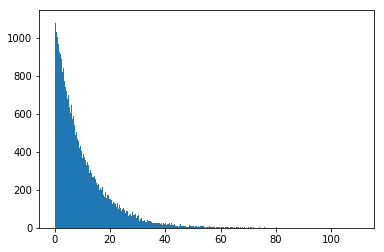

In [76]:
from numpy import *
from matplotlib.pyplot import *
y = random.rand(100000)
mu = 10
t = -mu*log(1-y)
hist(t,1000)

In [77]:
a=4.7e-7
b=1000
c=1e-4
root = sqrt(c/(3*b))

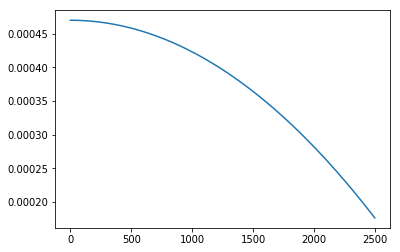

In [78]:
def g(E):
    return a*(b-c*E**2)
def G(E):
    return a*b*E*(1-root*E*E)
plot(E,g(E))

x = random.rand(100000) * (2500)
y = random.rand(100000) * (g(2500)-g(0)) + g(0)
Ene = [x[i] for i in range(y.size) if y[i]<g(x[i]) ]


(array([ 94., 111., 124.,  91., 101., 106., 104.,  96.,  92., 100., 104.,
         91., 100.,  85., 106.,  93.,  92., 115.,  71., 117.,  95., 127.,
        116.,  99., 111., 105., 109., 107.,  93., 109., 105.,  99.,  92.,
        107., 113., 121.,  99.,  98., 106.,  85.,  93., 112., 101.,  97.,
        101., 110.,  97.,  97., 102., 111., 118.,  86.,  95.,  98.,  93.,
        105.,  69., 106.,  98., 104., 115., 106., 103., 108., 110., 100.,
         90., 102.,  86.,  97.,  98., 107.,  92., 105.,  93., 106.,  96.,
         82.,  93.,  74., 116., 118.,  93., 106., 106., 105., 117., 109.,
         82., 109.,  99., 107.,  98., 109.,  96.,  82.,  97., 104.,  95.,
        109., 105.,  96., 103.,  93.,  93., 109.,  73., 113.,  96.,  88.,
         95., 103.,  90.,  95., 112.,  96.,  92.,  99., 111.,  89.,  97.,
        105.,  80., 111., 105.,  86., 118., 106.,  98.,  99., 105., 104.,
         92.,  98.,  99., 101.,  98.,  99., 100., 102.,  86.,  85., 115.,
        109.,  76.,  93.,  73., 106., 

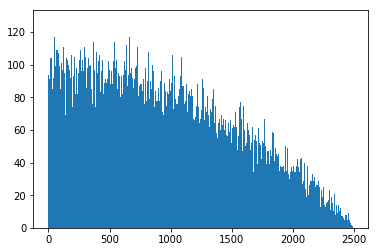

In [79]:
hist(Ene,1000)

(array([10102.,  9737.,  9442.,  8623.,  7863.,  6998.,  5744.,  4402.,
         2887.,  1052.]),
 array([3.52133999e-03, 2.48887174e+02, 4.97770826e+02, 7.46654478e+02,
        9.95538130e+02, 1.24442178e+03, 1.49330543e+03, 1.74218909e+03,
        1.99107274e+03, 2.23995639e+03, 2.48884004e+03]),
 <a list of 10 Patch objects>)

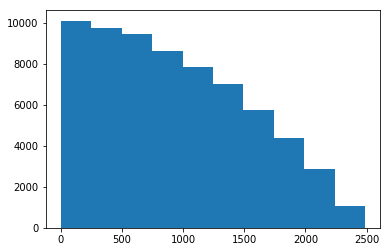

In [85]:
#hist(t)
hist(Ene)

In [89]:
delta = 3 # risoluzione di tre secondi
Eresidua=0
Npileup = 0
Energies = np.zeros(0) #registered energies events
Pileups = np.zeros(0)
for i in range(len(Ene)):
    Npileup += 1
    if (t[i]<=delta):
        Eresidua += Ene[i]
    if (t[i]>delta):
        #riempio istogrami
        Energies = append(Energies,Ene[i]+Eresidua)
        Pileups = append(Pileups, Npileup)
        Eresidua = 0
        Npileup = 0

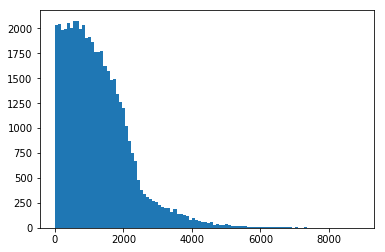

(array([3.6697e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.4430e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.4940e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.5000e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.3000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

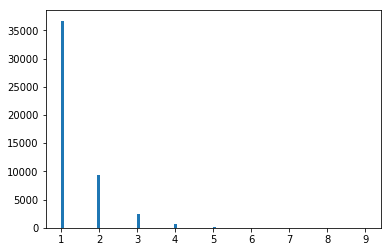

In [96]:
hist(Energies,100) #HRiv
show()
hist(Pileups,1000) #Hpp
show()
hist(Ene,1000) #HEne
show()
hist()

In [1]:
%matplotlib notebook

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

0.5120439775888804
0.5028750287502876


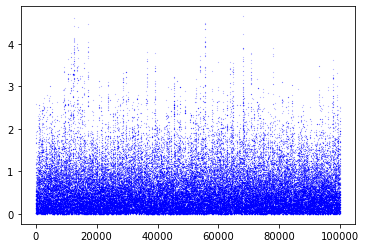

In [1]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# campionare e^-r, r*e^-r*costheta

# campionare e^-x

def p(x):
    if x>0:
        return np.exp(-2*x)
    else:
        return 0
    
    
def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand()*diametro-diametro/2 
    #tra -10 e 10

N=100000    

punti = np.zeros(0)

np.random.seed(0)
diametro = 1.6


x = 0
r = np.random.rand(N)


integral = 0

attempted = 0
accepted = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)
    attempted += 1
    
    integral += x
    punti = np.append(punti,x)
        
    A = 0
    if(p(x) == 0):
        A = 1 #transisco sicuramente da x a xNew
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
        accepted += 1

    

plt.plot(punti,'bo',markersize=.1)
integral/= attempted
print(integral)
print(accepted/attempted)

(array([2.2350e+04, 1.5664e+04, 7.3690e+03, 2.9910e+03, 1.0900e+03,
        4.9700e+02, 1.7800e+02, 9.9000e+01, 4.0000e+01, 9.0000e+00]),
 array([1.71344823e-05, 4.65279586e-01, 9.30542037e-01, 1.39580449e+00,
        1.86106694e+00, 2.32632939e+00, 2.79159184e+00, 3.25685429e+00,
        3.72211674e+00, 4.18737920e+00, 4.65264165e+00]),
 <a list of 10 Patch objects>)

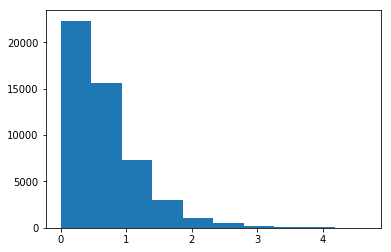

In [98]:
plt.hist(punti)

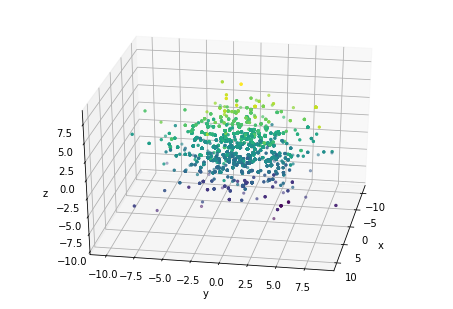

In [3]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d import Axes3D

# campionare e^-r, r*e^-r*costheta

# campionare e^-x




def p(x):
    R = np.linalg.norm(x)
    return np.exp(-R)

diametro = 20 #diam. esplorazione

def xNuovo(x0):
    # estrai un nuovo con distribuz.
    # T(xNew,x0) (tentativa)
    return np.random.rand(3)*diametro - diametro/2
    #tra -10 e 10

N=10000    
    
punti = np.array([[0,0,0]])

np.random.seed(1)


x= np.array([[0,0,0]])
r = np.random.rand(N)

integrale = 0

for i in range(1,N):
    
    xNew = x + xNuovo(x)

    if(p(x) is 0):
        A = 1
    else:
        A = min( 1,p(xNew)/p(x) )
    
    if r[i]<=A:
        x= xNew
    punti = np.append(punti,x,axis=0)
    
    R = np.linalg.norm(x)
    integrale += np.exp(-R)

integrale /= N


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(punti[:,0], punti[:,1], punti[:,2], c=punti[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 10)
plt.show()

In [4]:
integrale

0.18253460271481514

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## reticolo


In [2]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yD, errD=np.loadtxt("c++/output/outfile221.txt", unpack=True)

N=yD.shape[0]
x=np.arange(1,N+1)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])

print( ' --- Random Walk over a discrete lattice --- ')
print('fit with k*sqrt(x): k = ',p_opt_disc)
print('confidence over k : +- ',np.sqrt(p_cov_disc))


plt.figure(figsize=(16,5))
plt.suptitle("Random Walk su reticolo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

OSError: c++/output/outfile221.txt not found.